In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
base_dir = "C://DATA//train//49_kaggle//KaggleFun//HealthAnalytics//DATA"
df_train = pd.read_csv(os.path.join(base_dir,"pro_train.csv"))
df_test = pd.read_csv(os.path.join(base_dir,"pro_test.csv"))
df_train.head(5)

,Unnamed: 0,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,231676,0,7,1,4,2,1,2,2.0,8.0,0,1,4,4,6247.0,2
1,166821,0,7,1,2,3,3,2,1.0,2.0,0,1,6,6,8000.0,10
2,70566,1,2,1,2,3,2,3,3.0,7.0,0,2,3,2,4987.0,1
3,197982,1,2,1,2,2,1,3,3.0,14.0,1,1,3,6,7210.0,6
4,280389,3,13,1,4,3,2,1,2.0,8.0,2,1,2,4,3178.0,5


In [2]:
df_y = df_train.Stay
df_train = df_train.drop("Stay", axis = 1)

In [3]:
df_test_y = df_test.Stay
df_test = df_test.drop("Stay", axis=1)

In [4]:
def eva(model):
    y0 = model.predict(df_train)
    correct = 0
    df_y0 = df_y
    for i in range(len(y0)):
        if y0[i] == df_y0[i]: 
            correct += 1
    a1 = correct / len(df_train)
    
    y0 = model.predict(df_test)
    correct = 0
    df_y0 = df_test_y
    for i in range(len(y0)):
        if y0[i] == df_y0[i]: 
            correct += 1
    a2 = correct / len(df_test)
    
    print(a1,a2)
    return a1, a2

In [6]:
from xgboost import XGBClassifier
learning_rate = 0.5
max_depth = 5
n_estimators = 200

for learning_rate in [0.3,0.7]:
    for max_depth in [8,10]:
        for n_estimators in [200,250]:
            xgb_model=XGBClassifier(objective="multi:softmax",learning_rate=learning_rate,min_child_weight=1, max_depth=max_depth, n_estimators=n_estimators)
            xgb_model.fit(df_train,df_y)
            print("Train Complete, Evaluating...")
            print("LR: {}, Depth: {}, Estimators: {}".format(learning_rate, max_depth, n_estimators))
            a1, a2 = eva(xgb_model)
            del xgb_model

Train Complete, Evaluating...
LR: 0.3, Depth: 8, Estimators: 200
0.6020019627085378 0.4205658836829544
Train Complete, Evaluating...
LR: 0.3, Depth: 8, Estimators: 250
0.6302688910696762 0.420879914583595
Train Complete, Evaluating...
LR: 0.3, Depth: 10, Estimators: 200
0.7371305201177625 0.4194667755307122
Train Complete, Evaluating...
LR: 0.3, Depth: 10, Estimators: 250
0.7771344455348381 0.4181478457480216
Train Complete, Evaluating...
LR: 0.7, Depth: 8, Estimators: 200
0.7293699705593719 0.40503705564627557
Train Complete, Evaluating...
LR: 0.7, Depth: 8, Estimators: 250
0.7714425907752699 0.40384373822384123
Train Complete, Evaluating...
LR: 0.7, Depth: 10, Estimators: 200
0.8943473994111875 0.3972804924004522
Train Complete, Evaluating...
LR: 0.7, Depth: 10, Estimators: 250
0.928153091265947 0.3963069966084663


In [8]:
xgb_model=XGBClassifier(objective="multi:softmax",learning_rate=0.3,min_child_weight=1, max_depth=8, n_estimators=250)
xgb_model.fit(df_train,df_y)
print("Train Complete, Evaluating...")
print("LR: {}, Depth: {}, Estimators: {}".format(learning_rate, max_depth, n_estimators))
a1, a2 = eva(xgb_model)

Train Complete, Evaluating...
LR: 0.7, Depth: 10, Estimators: 250
0.6302688910696762 0.420879914583595


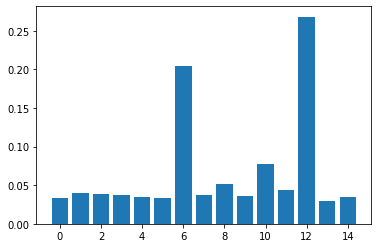

In [9]:
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()

In [12]:
np.argsort(xgb_model.feature_importances_)

array([13,  5,  0,  4, 14,  9,  7,  3,  2,  1, 11,  8, 10,  6, 12],
      dtype=int64)

# 60% train acc and 41% test acc is actually not bad! Considering we have 11 classes. Although it does sound like we have some overfitting going on here, it gets worse the complexity of the model goes up (depth and estimator)